<a href="https://colab.research.google.com/github/kavithachitriki/OCRProject/blob/main/emnist_usage1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
from keras.models import load_model
from sklearn.preprocessing import LabelBinarizer
panimg=cv2.imread('pan13.jpeg')
emnist_model = load_model('emnist_trained.h5')
mapp = pd.read_csv(
    r'emnist-letters-mapping.txt',
    delimiter=' ',
    index_col=0,
    header=None,
    squeeze=True
)
string_list = [chr(i) for i in mapp[1].values]
string_list
mapp['String'] = string_list
mapp


,1,2,String
0,,,
1,65,97,A
2,66,98,B
3,67,99,C
4,68,100,D
5,69,101,E
6,70,102,F
7,71,103,G
8,72,104,H
9,73,105,I


In [106]:
mapp.head()

,1,2
0,,
1,65,97
2,66,98
3,67,99
4,68,100
5,69,101


# New Section

In [9]:
from IPython.display import Image, SVG
import seaborn as sns

# Filepaths, Numpy, Tensorflow
import os
import numpy as np
import tensorflow as tf

# Keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

sns.set()

In [58]:
pip install emnist

In [59]:
from emnist import list_datasets
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [60]:
from emnist import extract_training_samples
images_train, labels_train = extract_training_samples('letters')
from emnist import extract_test_samples
images_test, labels_test = extract_test_samples('letters')


In [61]:
# Check shape of training and testing data
print(images_train.shape)
print(labels_train.shape)
print(images_test.shape)
print(labels_test.shape)

(124800, 28, 28)
(124800,)
(20800, 28, 28)
(20800,)


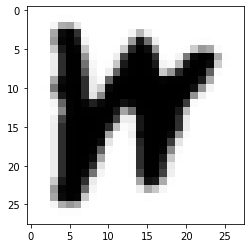

In [62]:
# Plot an image
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(images_train[0,:,:], cmap=plt.cm.Greys)

In [63]:
# Flatten Data
dims = images_train.shape[1] * images_train.shape[2]
X_train = images_train.reshape(images_train.shape[0], dims)
X_test = images_test.reshape(images_test.shape[0], dims)
print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (124800, 784)
Testing Shape: (20800, 784)


In [64]:
# Rescale to 0 -> 1 by dividing by max pixel value (255)
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [77]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_train = X_train[:,0]
y_train = lb.fit_transform(y_train)
y_test = X_test[:,0]
y_test = lb.fit_transform(y_test)

In [65]:

from keras.utils import np_utils # used to convert array of labeled data to one-hot vector
# should be 26 but out of index?
# Effects accuracy as have a class where their will be no results
num_classes = 27
y_train = np_utils.to_categorical(labels_train, num_classes)
y_test = np_utils.to_categorical(labels_test, num_classes)

In [40]:
# Empty Sequential model
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(1,28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

# Output Layer - number of nodes corresponds to number of y labels
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs=50, batch_size=32,  verbose=1)

ValueError: ignored

In [21]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop' , metrics=['accuracy'])

In [22]:
# Train Model
model.fit(X_train, y_train, batch_size=128, epochs=10, shuffle=True, verbose=2)

Epoch 1/10
975/975 - 14s - loss: 0.5815 - accuracy: 0.8196
Epoch 2/10
975/975 - 13s - loss: 0.2963 - accuracy: 0.9033
Epoch 3/10
975/975 - 13s - loss: 0.2379 - accuracy: 0.9208
Epoch 4/10
975/975 - 14s - loss: 0.2041 - accuracy: 0.9304
Epoch 5/10
975/975 - 13s - loss: 0.1829 - accuracy: 0.9377
Epoch 6/10
975/975 - 13s - loss: 0.1680 - accuracy: 0.9419
Epoch 7/10
975/975 - 13s - loss: 0.1565 - accuracy: 0.9456
Epoch 8/10
975/975 - 13s - loss: 0.1460 - accuracy: 0.9479
Epoch 9/10
975/975 - 14s - loss: 0.1386 - accuracy: 0.9508
Epoch 10/10
975/975 - 13s - loss: 0.1318 - accuracy: 0.9530


In [23]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (128, 500)                392500    
_________________________________________________________________
dense_4 (Dense)              (128, 500)                250500    
_________________________________________________________________
dense_5 (Dense)              (128, 27)                 13527     
Total params: 656,527
Trainable params: 656,527
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.save("emnist_trained.h5")

In [25]:
# Load Model
from tensorflow.keras.models import load_model
model = load_model("emnist_trained.h5")

In [26]:
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


650/650 - 2s - loss: 0.4128 - accuracy: 0.9145
Loss: 0.4127715528011322, Accuracy: 0.9145192503929138


In [27]:
test = np.expand_dims(X_train[8], axis=0)
test.shape

(1, 784)

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)

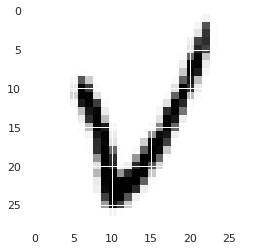

In [29]:
plt.imshow(scaler.inverse_transform(test).reshape(28,28), cmap=plt.cm.Greys)

In [30]:
model.predict_classes(test)

array([22])

In [31]:
test = np.expand_dims(X_train[22], axis=0)
test.shape

(1, 784)

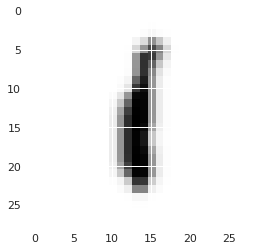

In [32]:

plt.imshow(scaler.inverse_transform(test).reshape(28,28), cmap=plt.cm.Greys)

In [33]:

model.predict(test).round()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [34]:

model.predict_classes(test)

array([9])

# EMNIST Try with 32

In [6]:
import cv2
import numpy as np
import imutils
panimg=cv2.imread('pan3.jpeg')
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)



x1=230
y1=585
x2=680
y2=612
firstName = panimg[y1:y2, x1:x2]
#image = cv2.imread('pan3.jpeg')
# Load image, grayscale, Otsu's threshold 
import cv2

image=firstName
copy = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)
kernel = np.ones((3, 3), np.uint8)
imgMorph = cv2.erode(thresh, kernel, iterations = 1)
contours, hierarchy = cv2.findContours(imgMorph,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnts=contours
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sort_contours(cnts, method="left-to-right")[0]

letters=[]
ROI_number = 0
for c in cnts:
    if cv2.contourArea(c) < 100:
      continue
    print(cv2.contourArea(c))
    x,y,w,h = cv2.boundingRect(c)
    aspect_ratio = h/w
    if aspect_ratio < 0.4:
      continue
    ROI = thresh[y:y+h, x:x+w]
    cv2_imshow(ROI)
    roi1=cv2.rectangle(copy,(x,y),(x+w,y+h),(36,255,12),2)
    roi = cv2.resize(ROI, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
    roi = np.array(roi) 
    t = np.copy(roi)
    t = t / 255.0
    t = 1 - t
    t = t.reshape(1, 784)
    ypred = emnist_model.predict_classes(t)
    ypred=mapp['String'][ypred]
    [x] = ypred
    print(x)
    letters.append(x)
   

cv2_imshow(thresh)
cv2_imshow(copy)
print(letters)



623.0
179.5


L
117.5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


J
180.5


D
183.0


M
258.0


A
168.5


G
209.0


L
150.5


G
184.5


G
255.5


J
198.5


H
182.0


B
255.5


V
248.0


L
245.0


L
247.0


L
256.5


L
262.5


L
269.0


J
258.5


L
261.5


L
266.5


J


['L', 'J', 'D', 'M', 'A', 'G', 'L', 'G', 'G', 'J', 'H', 'B', 'V', 'L', 'L', 'L', 'L', 'L', 'J', 'L', 'L', 'J']
